### Import Libraries

In [2]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

### Load the dataset

In [3]:
# load the dataset
fmri_dataset = torch.load('data/fMRI_data/demo1/digits-fmri')
# load the labels
labels = torch.load('data/images/demo1/raw_imgs/digits-labels') - 1
# print the shape
print(fmri_dataset.shape)
print(labels.shape)


(100, 3092)
(100, 1)


In [4]:
total_blocks = fmri_dataset.shape[0]
fmri_size = fmri_dataset.shape[1]
print('total blocks : '+str(total_blocks))
print('input fmri size : '+str(fmri_size))

total blocks : 100
input fmri size : 3092


In [5]:
print(labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [17]:
n_epochs = 100
batch_size = 10
test_size = 10

In [7]:
# define the model


class SemanticDecoder(nn.Module):
  """
  Initialize MLP Network
  """

  def __init__(self, actv, input_feature_num, hidden_unit_nums, output_feature_num):
    """
    Initialize MLP Network parameters

    Args:
      actv: string
        Activation function
      input_feature_num: int
        Number of input features
      hidden_unit_nums: list
        Number of units in the hidden layer
      output_feature_num: int
        Number of output features

    Returns:
      Nothing
    """
    super(SemanticDecoder, self).__init__()
    self.input_feature_num = input_feature_num # Save the input size for reshaping later
    self.model = nn.Sequential() # Initialize layers of MLP

    in_num = input_feature_num # Initialize the temporary input feature to each layer
    for i in range(len(hidden_unit_nums)): # Loop over layers and create each one

      out_num = hidden_unit_nums[i] # Assign the current layer hidden unit from list
      layer = nn.Linear(in_num, out_num) # Use nn.Linear to define the layer

      in_num = out_num # Assign next layer input using current layer output
      self.model.add_module('Linear_%d'%i, layer) # Append layer to the model with a name

      actv_layer = eval('nn.%s'%actv) # Assign activation function (eval allows us to instantiate object from string)
      self.model.add_module('Activation_%d'%i, actv_layer) # Append activation to the model with a name

    out_layer = nn.Linear(in_num, output_feature_num) # Create final layer
    self.model.add_module('Output_Linear', out_layer) # Append the final layer

    actv_layer = nn.Sigmoid()
    self.model.add_module('LastActivation', actv_layer)

  def forward(self, x):
    """
    Simulate forward pass of MLP Network

    Args:
      x: torch.tensor
        Input data

    Returns:
      logits: Instance of MLP
        Forward pass of MLP
    """
    # Reshape inputs to (batch_size, input_feature_num)
    # Just in case the input vector is not 2D, like an image!
    x = x.view(x.shape[0], -1)
    logits = self.model(x) # Forward pass of MLP
    return logits


In [8]:
hidden_layers_shape = [1024, 64]
activation = 'Tanh()'
semanticDecoder = SemanticDecoder(actv=activation, input_feature_num=fmri_size, hidden_unit_nums=hidden_layers_shape, output_feature_num=2)
# y = net()
# print(f'The output shape is {y.shape} for an input of shape {fmri_size.shape}')

In [9]:
cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
fmri = torch.from_numpy(fmri_dataset)
fmri = fmri.type(Tensor)
print(type(fmri_dataset))
semanticDecoder.forward(fmri)

<class 'numpy.ndarray'>


tensor([[0.4747, 0.4893],
        [0.4757, 0.4898],
        [0.4754, 0.4903],
        [0.4726, 0.4909],
        [0.4727, 0.4909],
        [0.4739, 0.4905],
        [0.4736, 0.4914],
        [0.4747, 0.4914],
        [0.4741, 0.4905],
        [0.4734, 0.4909],
        [0.4739, 0.4901],
        [0.4732, 0.4909],
        [0.4747, 0.4895],
        [0.4757, 0.4905],
        [0.4744, 0.4916],
        [0.4756, 0.4914],
        [0.4751, 0.4897],
        [0.4745, 0.4893],
        [0.4746, 0.4917],
        [0.4728, 0.4918],
        [0.4756, 0.4907],
        [0.4747, 0.4920],
        [0.4747, 0.4907],
        [0.4742, 0.4913],
        [0.4754, 0.4908],
        [0.4732, 0.4917],
        [0.4741, 0.4907],
        [0.4736, 0.4911],
        [0.4735, 0.4918],
        [0.4745, 0.4902],
        [0.4738, 0.4921],
        [0.4735, 0.4912],
        [0.4737, 0.4917],
        [0.4734, 0.4910],
        [0.4748, 0.4914],
        [0.4743, 0.4904],
        [0.4737, 0.4918],
        [0.4733, 0.4915],
        [0.4

In [10]:
# define the loss function
loss_function = torch.nn.CrossEntropyLoss()

# define optimizer
# tuning the hyperparameters
lr = 0.0002
b1 = 0.5
b2 = 0.999

gamma_1 = 0.8
step_1 = 10
last_epoch_1 = -1
optimizer = torch.optim.Adam(semanticDecoder.parameters(), lr=lr, betas=(b1, b2))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_1, gamma=gamma_1, last_epoch=last_epoch_1)

In [11]:
train_fmri = np.concatenate([fmri[0:45], fmri[50:95]])
test_fmri = np.concatenate([fmri[45:50], fmri[95:100]])

rand_id = np.random.randint(low=0, high=train_fmri.shape[0], size=train_fmri.shape[0])
train_fmri = train_fmri[rand_id]
fmri = np.concatenate([train_fmri, test_fmri])
print(fmri.shape)

train_labels = np.concatenate([labels[0:45], labels[50:95]])
test_labels = np.concatenate([labels[45:50], labels[95:100]])
train_labels = train_labels[rand_id]
labels = np.concatenate([train_labels, test_labels])

fmri = torch.from_numpy(fmri)
fmri = fmri.type(Tensor)

train_fmri = torch.from_numpy(train_fmri)
train_labels = torch.from_numpy(train_labels)
train_labels = train_labels.squeeze()
train_fmri = train_fmri.type(Tensor)
train_labels = train_labels.type(Tensor)

test_fmri = torch.from_numpy(test_fmri)
test_labels = torch.from_numpy(test_labels)
test_labels = test_labels.squeeze()
test_fmri = test_fmri.type(Tensor)
test_labels = test_labels.type(Tensor)

(100, 3092)


In [12]:
n_epochs = 100

In [13]:
acc_vec = []
train_vec = []
loss_vec = []
for epoch in range(n_epochs):
    for i in range(0, 9):
            fmri_data = train_fmri[i*batch_size:(i+1) * batch_size]
            labels_data = train_labels[i*batch_size:(i+1) * batch_size]
            labels_data = labels_data.long()
            optimizer.zero_grad()
            predict = semanticDecoder(fmri_data)
            loss = loss_function(predict, labels_data)
            loss.backward()
            optimizer.step()
            loss_vec.append(loss.item())
            print(
                "[Epoch %d/%d] [Batch %d] [loss: %f] "
                % (epoch, n_epochs, i, loss.item())
            )

    if epoch % 1 == 0:
            test_fmri_data = test_fmri
            test_label_data = test_labels.cpu().detach().numpy()
            lbs = semanticDecoder(test_fmri_data)
            cpu_labels = lbs.cpu().detach().numpy()
            pred = [np.argmax(lb) for lb in cpu_labels]
            num_correct = (pred == test_label_data).sum()
            acc = num_correct / 10
            acc_vec.append(acc)


    scheduler.step()
    lrd = optimizer.param_groups[0]['lr']

print(acc_vec)

[Epoch 0/100] [Batch 0] [loss: 0.695015] 
[Epoch 0/100] [Batch 1] [loss: 0.692108] 
[Epoch 0/100] [Batch 2] [loss: 0.681354] 
[Epoch 0/100] [Batch 3] [loss: 0.715985] 
[Epoch 0/100] [Batch 4] [loss: 0.699409] 
[Epoch 0/100] [Batch 5] [loss: 0.688866] 
[Epoch 0/100] [Batch 6] [loss: 0.680165] 
[Epoch 0/100] [Batch 7] [loss: 0.679078] 
[Epoch 0/100] [Batch 8] [loss: 0.684479] 
[Epoch 1/100] [Batch 0] [loss: 0.674496] 
[Epoch 1/100] [Batch 1] [loss: 0.668145] 
[Epoch 1/100] [Batch 2] [loss: 0.645291] 
[Epoch 1/100] [Batch 3] [loss: 0.749052] 
[Epoch 1/100] [Batch 4] [loss: 0.707656] 
[Epoch 1/100] [Batch 5] [loss: 0.679307] 
[Epoch 1/100] [Batch 6] [loss: 0.641026] 
[Epoch 1/100] [Batch 7] [loss: 0.647887] 
[Epoch 1/100] [Batch 8] [loss: 0.668223] 
[Epoch 2/100] [Batch 0] [loss: 0.650306] 
[Epoch 2/100] [Batch 1] [loss: 0.639435] 
[Epoch 2/100] [Batch 2] [loss: 0.602445] 
[Epoch 2/100] [Batch 3] [loss: 0.783117] 
[Epoch 2/100] [Batch 4] [loss: 0.713521] 
[Epoch 2/100] [Batch 5] [loss: 0.6

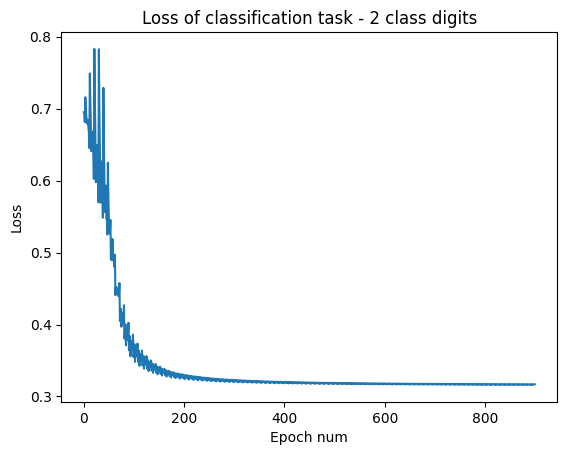

In [14]:
plt.figure()
plt.title('Loss of classification task - 2 class digits')
plt.plot(loss_vec)
plt.xlabel('Epoch num')
plt.ylabel('Loss')
plt.show()

# shape decoder

In [32]:
# load the dataset
fmri = torch.load('data/fMRI_data/demo1/digits-fmri')
imgs = torch.load('data/images/demo1/raw_imgs/digits-images')
train_fmri = np.concatenate([fmri[0:45], fmri[50:95]])
test_fmri = np.concatenate([fmri[45:50], fmri[95:100]])
train_imgs = np.concatenate([imgs[0:45], imgs[50:95]])
test_imgs = np.concatenate([imgs[45:50], imgs[95:100]])

In [33]:

class ShapeDecoder(nn.Module):
    def __init__(self, input_size, latent_dim):
        super(ShapeDecoder, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, latent_dim),
            nn.Tanh()
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        x = self.model(img_flat)
        return x


In [34]:
output_size_2=28
n_epochs_2=101
batch_size_2=10
lr_2=0.0006
b1=0.5
b2=0.999

In [35]:
latent_dim = output_size_2 *output_size_2
rand_id = np.random.randint(low=0, high=train_fmri.shape[0], size=train_fmri.shape[0])
train_fmri = train_fmri[rand_id]
train_img = train_imgs[rand_id]
raw_img = imgs
fmri = np.concatenate([train_fmri, test_fmri])
imgs = np.concatenate([train_img, test_imgs])
total_blocks = fmri.shape[0]
fmri_size = fmri.shape[1]
train_num = total_blocks - 10
batch_num = train_num / batch_size
print('Train blocks:'+str(train_num))
print('batch num:' + str(batch_num))

Train blocks:90
batch num:9.0


In [36]:
# Use binary cross-entropy loss
loss_function = torch.nn.BCELoss()
pixelwise_loss = torch.nn.L1Loss()
# Initialize generator and discriminator
decoder = ShapeDecoder(input_size=fmri_size, latent_dim=latent_dim)

In [37]:
cuda = True if torch.cuda.is_available() else False
if cuda:
    decoder.cuda()
    loss_function.cuda()
    pixelwise_loss.cuda()

optimizer = torch.optim.Adam(decoder.parameters(), lr=lr_2, betas=(b1, b2))
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7, last_epoch=-1)

In [38]:
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

print(fmri.shape)
fmri = torch.from_numpy(fmri)
fmri = fmri.type(Tensor)


imgs = torch.from_numpy(imgs)
imgs = imgs.type(Tensor)

(100, 3092)


In [39]:
for epoch in range(n_epochs + 1):
    for i in range(0, int(batch_num)):
        fmri_data = fmri[i * batch_size:(i + 1) * batch_size]
        real_imgs = imgs[i * batch_size:(i + 1) * batch_size]
        optimizer.zero_grad()
        latent_vector = decoder(fmri_data)
        obj_vector = real_imgs.reshape(real_imgs.shape[0], -1)
        e_loss = pixelwise_loss(obj_vector, latent_vector)

        e_loss.backward()
        optimizer.step()

        print(
            "[Epoch %d/%d] [Batch %d] [E loss: %f]"
            % (epoch, n_epochs, i, e_loss.item())
        )

    if epoch % 10 == 0:
        test_fmri_data = fmri[train_num:train_num + batch_size]
        latent_v = decoder(test_fmri_data)
        latent_v = latent_v.view(batch_size, 1, output_size_2, output_size_2)

        tempv = latent_v.data

imgs = decoder(fmri)
imgs = imgs.view(fmri.shape[0], output_size_2, output_size_2)
imgs = imgs.data.cpu() * 255.0
imgs = np.asarray(imgs)

[Epoch 0/100] [Batch 0] [E loss: 29.266792]
[Epoch 0/100] [Batch 1] [E loss: 31.002010]
[Epoch 0/100] [Batch 2] [E loss: 32.397259]
[Epoch 0/100] [Batch 3] [E loss: 37.525150]
[Epoch 0/100] [Batch 4] [E loss: 35.120819]
[Epoch 0/100] [Batch 5] [E loss: 31.532022]
[Epoch 0/100] [Batch 6] [E loss: 35.334747]
[Epoch 0/100] [Batch 7] [E loss: 33.944363]
[Epoch 0/100] [Batch 8] [E loss: 39.315094]
[Epoch 1/100] [Batch 0] [E loss: 29.250677]
[Epoch 1/100] [Batch 1] [E loss: 30.986464]
[Epoch 1/100] [Batch 2] [E loss: 32.385406]
[Epoch 1/100] [Batch 3] [E loss: 37.513092]
[Epoch 1/100] [Batch 4] [E loss: 35.105621]
[Epoch 1/100] [Batch 5] [E loss: 31.521788]
[Epoch 1/100] [Batch 6] [E loss: 35.320992]
[Epoch 1/100] [Batch 7] [E loss: 33.929562]
[Epoch 1/100] [Batch 8] [E loss: 39.300976]
[Epoch 2/100] [Batch 0] [E loss: 29.240677]
[Epoch 2/100] [Batch 1] [E loss: 30.975498]
[Epoch 2/100] [Batch 2] [E loss: 32.375629]
[Epoch 2/100] [Batch 3] [E loss: 37.503826]
[Epoch 2/100] [Batch 4] [E loss: